## Observations and Insights 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata,study_results, on ="Mouse ID", how = "outer")

# Display the data table for preview


In [78]:
# Display the data table for preview
combined_data

# There are 1893 rows and 8 columns in the combined dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [79]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

# The number of mouse included in the study is 249

249

In [80]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df= combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
dup_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [81]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_data.loc[combined_data["Mouse ID"]=="g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset =['Mouse ID','Timepoint'])
clean_data

# The five duplicate columns removed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

249

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_grouped= clean_data.groupby(["Drug Regimen"])
regimen_mean= regimen_grouped["Tumor Volume (mm3)"].mean()
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()
regimen_var = regimen_grouped["Tumor Volume (mm3)"].var()
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()
regimen_sum = regimen_grouped["Tumor Volume (mm3)"].sum()

summary_stat_tumor = pd.DataFrame({"Mean":regimen_mean, "Median":regimen_median, "Var":regimen_var, "std":regimen_std, "sem":regimen_sem})
summary_stat_tumor

,Mean,Median,Var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


regimen_grouped.agg(
       {
            "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"],
               }
    )


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [85]:
# determine the total number of measurements taken on each drug regimen

regimen_data_points =pd.DataFrame(clean_data["Drug Regimen"].value_counts()) 
regimen_data_points.columns = ["points"]

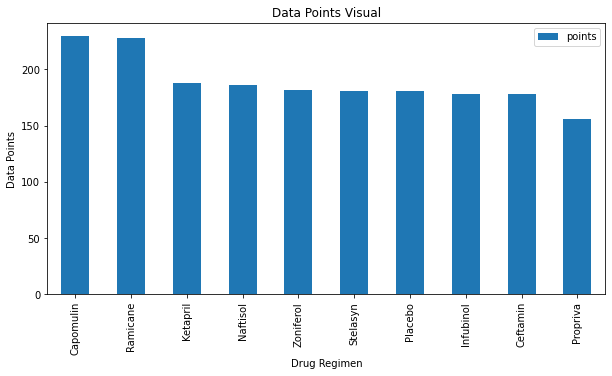

<Figure size 432x288 with 0 Axes>

In [86]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# create a bar chart of the data
regimen_data_points.plot(kind="bar", figsize=(10,5))

#set a title for the chart
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.savefig("../Images/BarDensity.png")
plt.show()
plt.tight_layout()

NameError: name 'points' is not defined

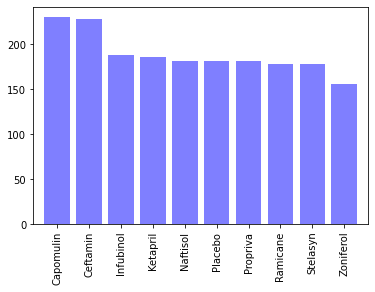

In [87]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Set x_axis and tick locations
x_axis = np.arange(len(regimen_data_points))
plt.bar(x_axis,regimen_data_points["points"], color = "b",alpha =0.5, align = "center")

tick_location = [value for value in x_axis]
plt.xticks(tick_location,['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation = 'vertical')
#

#set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0,max(points)+10)

#set a Title and labels

plt.title('Data Points Visual')
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

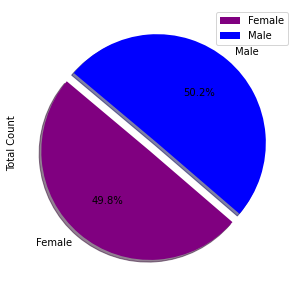

In [88]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = clean_data.groupby(["Mouse ID","Sex"])
groupby_gender

gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

colors = ['purple', 'b']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, 
                             autopct="%1.1f%%")

# Save an image of the chart and print it to the screen
plt.savefig("../Images/PieChart.png")
plt.show()

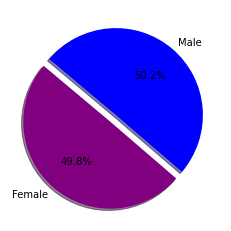

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Labels for the sections of our pie chart
labels = ["Female","Male"]

# The values of each section of the pie chart
sizes = [49.799197,50.200803]

# The colors of each section of the pie chart
colors = ['purple', 'b']

# Tells matplotlib to seperate the "Female" section from the other
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


# Save an image of the chart and print it to the screen
plt.savefig("../Images/PieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
ram_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
inf_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
cef_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
cap_max = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_max_df = pd.DataFrame(cap_max)

ram_max = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_max_df = pd.DataFrame(ram_max)

inf_max = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_max_df = pd.DataFrame(inf_max)

cef_max = cef_df.groupby('Mouse ID').max()['Timepoint']
cef_max_df = pd.DataFrame(cef_max)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

cap_max_merge = pd.merge(cap_max_df,clean_data,on=("Mouse ID","Timepoint"),how="left")
cap_max_merge

ram_max_merge = pd.merge(ram_max_df,clean_data,on=("Mouse ID","Timepoint"),how="left")
ram_max_merge

inf_max_merge = pd.merge(inf_max_df,clean_data,on=("Mouse ID","Timepoint"),how="left")
inf_max_merge

cef_max_merge = pd.merge(cef_max_df,clean_data,on=("Mouse ID","Timepoint"),how="left")
cef_max_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# set up lists to hold reponse info
t_vol = []

for treatment in treatments:
    t_vol_df =

In [92]:


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
#Capomulin outliers/ 
cap_tumor = cap_max_merge["Tumor Volume (mm3)"]

cap_quartiles = cap_tumor.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers could be values below {cap_lower_bound} and values above {cap_upper_bound}.")

#Ramicane Outliers/ 
ram_tumor = ram_max_merge["Tumor Volume (mm3)"]

ram_quartiles = ram_tumor.quantile([.25,.5,.75])
ram_lowerq =ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers could be values below {ram_lower_bound} and values above {ram_upper_bound}.")

#Infubinol Outliers/
inf_tumor = inf_max_merge["Tumor Volume (mm3)"]

inf_quartiles = inf_tumor.quantile([.25,.5,.75])
inf_lowerq =inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers could be values below {inf_lower_bound} and values above {inf_upper_bound}.")

#Ceftamin Outliers/
cef_tumor = cef_max_merge["Tumor Volume (mm3)"]

cef_quartiles = cef_tumor.quantile([.25,.5,.75])
cef_lowerq =cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers could be values below {cef_lower_bound} and values above {cef_upper_bound}.")

Capomulin potential outliers could be values below 20.70456164999999 and values above 51.83201549.
Ramicane potential outliers could be values below 17.912664470000003 and values above 54.30681135.
Infubinol potential outliers could be values below 36.83290494999999 and values above 82.74144559000001.
Ceftamin potential outliers could be values below 25.355449580000002 and values above 87.66645829999999.


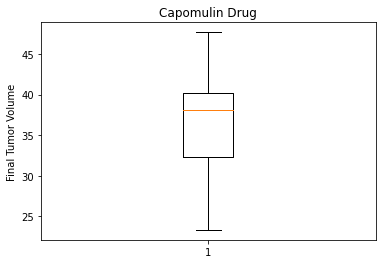

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin final tumor volume of each mouse
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(cap_tumor)
plt.savefig("../Images/boxplot_cap.png")
plt.show()

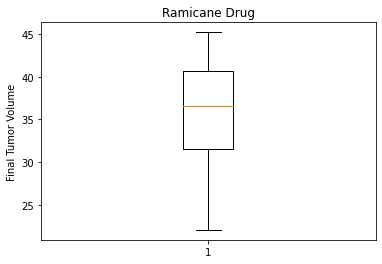

In [65]:
#Ramicane final tumor volume of each mouse
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(ram_tumor)
plt.savefig("../Images/boxplot_Ram.png")
plt.show()

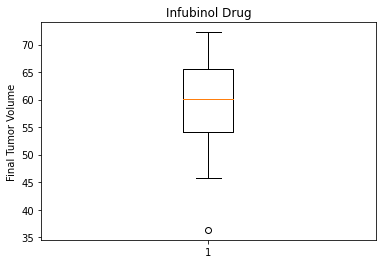

In [66]:
#Infubinol final tumor volume of each mouse
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(inf_tumor)
plt.savefig("../Images/boxplot_Inf.png")
plt.show()

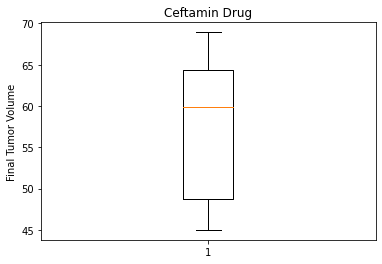

In [67]:
#Ceftamin final tumor volume of each mouse
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Drug')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(cef_tumor)
plt.savefig("../Images/boxplot_Cef.png")
plt.show()

## Line and Scatter Plots

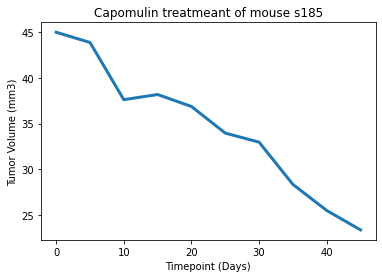

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


line_df = cap_df.loc[cap_df["Mouse ID"] == "s185",:]
line_df.head()

x_axis = line_df["Timepoint"]
tumor_vol = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axis,tumor_vol,linewidth=3, markersize=15)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('lineplotchart')
plt.savefig("../Images/lineplot_tumVol.png")
plt.show()

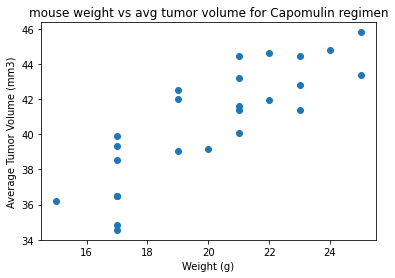

In [93]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df_average = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_df_average['Weight (g)'],cap_df_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('mouse weight vs avg tumor volume for Capomulin regimen')
plt.savefig('scatterplotaverage')
plt.savefig("../Images/scatterplot_Cam_AvgtumVol.png")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The r-squared is: 0.7088568047708719


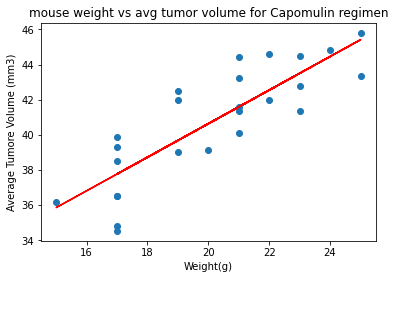

In [107]:
x_values = cap_df_average["Weight (g)"]
y_values = cap_df_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,30),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('mouse weight vs avg tumor volume for Capomulin regimen')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/linear_regression.png")
plt.show()

# There is a strong positive relationship between mouse weight and average tumor volume. 
# As the weight increases the tumor volume increases.